In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [5]:
train=ImageDataGenerator(rescale=10/255)

test=ImageDataGenerator (rescale=10/255)

train_dataset=train.flow_from_directory("D:/6th sem/CHS/major project 2/train",
                                        target_size=(150,150), batch_size=32, class_mode= 'binary')

test_dataset=test.flow_from_directory("D:/6th sem/CHS/major project 2/test",
                                      target_size=(150,150), batch_size=32, class_mode='binary')

Found 11137 images belonging to 2 classes.
Found 4772 images belonging to 2 classes.


In [9]:
train_dataset.class_indices


{'fire': 0, 'nonfire': 1}

In [10]:
model=keras.Sequential()
input_shape = (150, 150, 3)
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))



model.add(keras.layers.Flatten())
model.add(keras.layers. Dense (512, activation='relu'))
model.add(keras.layers. Dense (1,activation='sigmoid'))

C:\Users\yashc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
r=model.fit(train_dataset, epochs=10,validation_data=test_dataset)

Epoch 1/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 223s 635ms/step - accuracy: 0.7082 - loss: 0.5600 - val_accuracy: 0.7980 - val_loss: 0.4428
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 169s 483ms/step - accuracy: 0.8339 - loss: 0.3857 - val_accuracy: 0.8674 - val_loss: 0.3036
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 160s 455ms/step - accuracy: 0.9052 - loss: 0.2336 - val_accuracy: 0.9271 - val_loss: 0.1885
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 146s 419ms/step - accuracy: 0.9341 - loss: 0.1794 - val_accuracy: 0.9380 - val_loss: 0.1655
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 137s 392ms/step - accuracy: 0.9518 - loss: 0.1239 - val_accuracy: 0.9376 - val_loss: 0.1570
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 132s 376ms/step - accuracy: 0.9562 - loss: 0.1040 - val_accuracy: 0.9438 - val_loss: 0.1551
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 131s 374ms/step - accuracy: 0.9638 - loss: 0.0930 - val_accuracy: 0.9325 - val_loss: 0.1697
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 126s 361ms/step - accuracy: 0.9805 -

In [33]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [34]:
predictions


array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [15]:
def predictImage(filename):

    img1=image.load_img(filename, target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims (Y, axis=0)
    val=model.predict(X)
    val=np.round(val)
    print(val)
    if val==1:
        plt.xlabel("No Fire", fontsize=30)
    elif val==0:
        plt.xlabel("Fire", fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1.]]


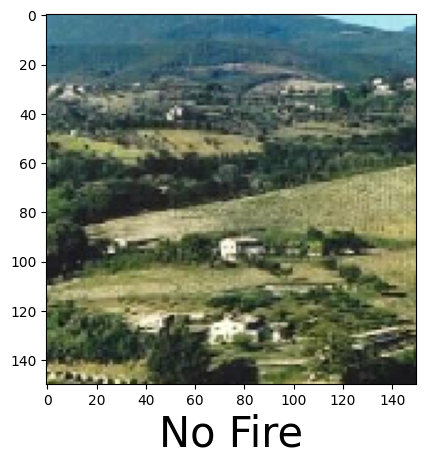

In [19]:
predictImage("D:/6th sem/CHS/major project/yt data/forest_fire/Testing/nofire/abc364.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1.]]


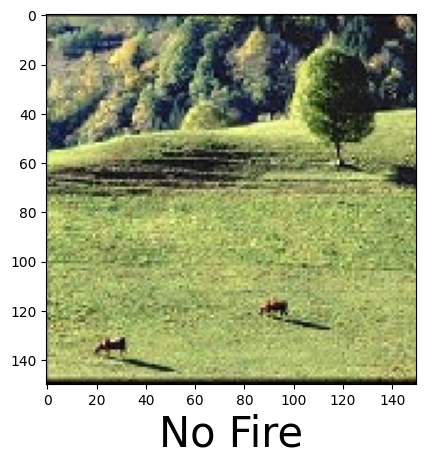

In [20]:
predictImage("D:/6th sem/CHS/major project/yt data/forest_fire/Testing/nofire/abc338.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0.]]


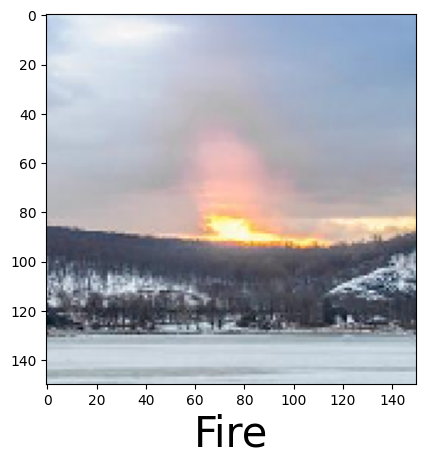

In [26]:
predictImage("D:/6th sem/CHS/major project/yt data/forest_fire/Testing/fire/abc184.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[0.]]


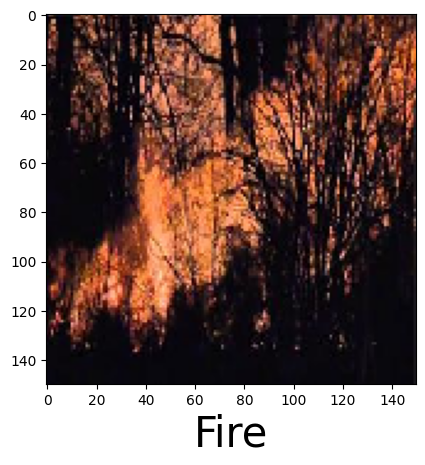

In [27]:
predictImage("D:/6th sem/CHS/major project/yt data/forest_fire/Testing/fire/abc189.jpg")


In [1]:
predictImage("C:/Users/yashc/OneDrive/Pictures/Screenshots")

NameError: name 'predictImage' is not defined